In [3]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 5.1 MB/s eta 0:00:00:00:01


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Load the chat data into a pandas DataFrame
df = pd.read_csv('Customer-Support.csv')

# Display the first few rows and basic info
print(df.head())
print(df.info())

#

                                   query  \
0           My order hasn't arrived yet.   
1          I received a damaged product.   
2              I need to return an item.   
3  I want to change my shipping address.   
4       I have a question about my bill.   

                                            response  
0  We apologize for the inconvenience. Can you pl...  
1  We apologize for the inconvenience. Can you pl...  
2  Certainly. Please provide your order number an...  
3  No problem. Can you please provide your order ...  
4  We'd be happy to help. Can you please provide ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   query     74 non-null     object
 1   response  74 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB
None


In [5]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Basic statistics
print(df.describe())



query       0
response    0
dtype: int64
                                              query  \
count                                            74   
unique                                           74   
top     How do I report a lost or stolen gift card?   
freq                                              1   

                                                 response  
count                                                  74  
unique                                                 73  
top     Thank you for your interest. Can you please pr...  
freq                                                    2  


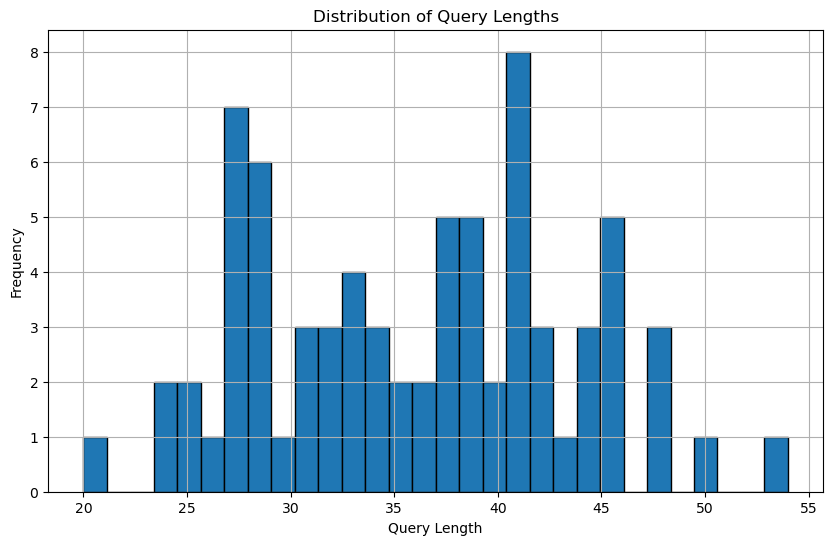

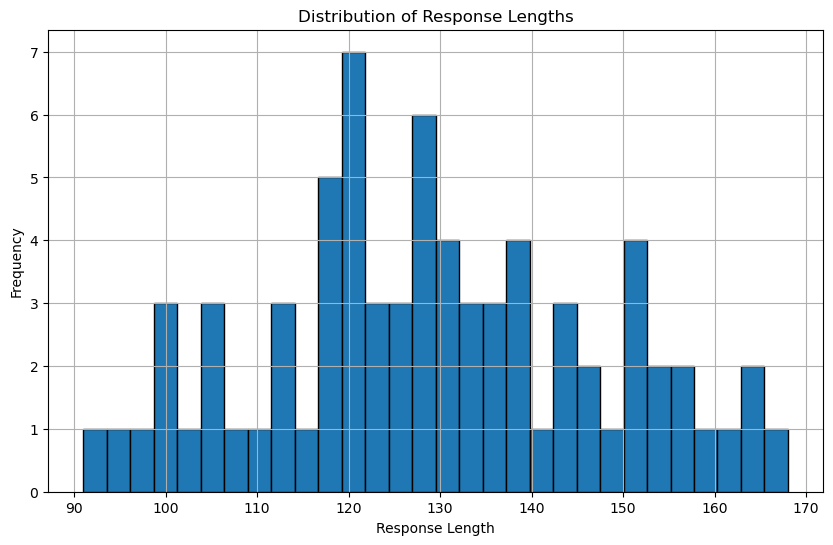

In [7]:
# Visualizations

# Histogram of query lengths
df['query_length'] = df['query'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
plt.hist(df['query_length'], bins=30, edgecolor='black')
plt.xlabel('Query Length')
plt.ylabel('Frequency')
plt.title('Distribution of Query Lengths')
plt.grid(True)
plt.show()

# Histogram of response lengths
df['response_length'] = df['response'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
plt.hist(df['response_length'], bins=30, edgecolor='black')
plt.xlabel('Response Length')
plt.ylabel('Frequency')
plt.title('Distribution of Response Lengths')
plt.grid(True)
plt.show()


In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

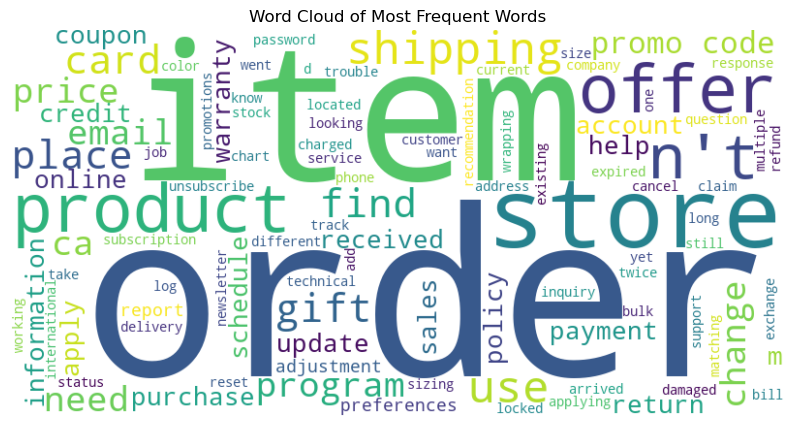

In [13]:
# Word cloud of most frequent words
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Most Frequent Words')
    plt.show()

# Tokenize and preprocess text for word cloud
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return " ".join(tokens)

# Concatenate all query into a single string
all_query = " ".join(df['query'].astype(str).apply(preprocess_text))

# Generate and display word cloud
plot_wordcloud(all_query)

